### Analyze Sensitivity Results

In [1]:
tgt_dirs = [6]

In [2]:
import os
import pandas as pd
results = []
converged_res = []
unconverged_res = []
for i in tgt_dirs:
    res_dir = 'tongwei_v5_sssim_cali_exp_1_{}'.format(i)
    contents = os.listdir(res_dir)
    result_name = 'chw_sup_m.m_flow'
    outputs = ['chw_sup_m.m_flow', 'chw_sup_P.p', 'terminal_resist1.y_actual', 'bypass_pipe.dp_nominal',
            'bypass_pipe.dp', 'chw_ret_pipe.port_b.p', 'prim_ret_pipe.port_b.p', 'chwp_1.dp', 'chwp_1.port_b.p',
            'chiller_1.dp', 'chiller_1.dp_nominal', 'prim_sup_pipe.port_b.p', 'secd_ret_pipe.port_b.p',
            'chwp_18.dp', 'chwp_18.port_b.p','chwp_18_pipe.port_b.p', 'chwp_18_pipe.dp', 'chwp_18_pipe.dp_nominal',
            'secd_sup_pipe.port_b.p', 'terminal_resist1.dp', 
             'bypass_pipe.m_flow', 'chiller_1.m_flow', 'chwp_18_pipe.m_flow',
             'chwp_1.m_flow', 'chwp_1.y_actual']
    result_idx = outputs.index(result_name)
    for content in contents:
        if 'run' in content:
            result_file_path = res_dir + os.sep + content + os.sep + 'sensi_sim_res.csv'
            try:
                result_pd = pd.read_csv(result_file_path, header = None)
                results.append(result_pd.values[:, result_idx])
                converged_res.append(res_dir + os.sep + content)
            except:
                unconverged_res.append(res_dir + os.sep + content)
print(len(results))

112


In [13]:
for res in results:
    res[np.isnan(res)] = 0
results

[array([   0.        ,  803.87765636,    0.        , 1764.2790279 ]),
 array([   0.        ,  772.67678213,    0.        , 1601.26256769]),
 array([   0.        ,  810.60216799,    0.        , 1662.26399446]),
 array([  0.        , 854.60644569,   0.        ,   0.        ]),
 array([  0.        , 860.60456087,   0.        ,   0.        ]),
 array([  0.        , 869.34425898,   0.        ,   0.        ]),
 array([  0.        , 823.79701424,   0.        ,   0.        ]),
 array([  0.        , 866.76853955,   0.        ,   0.        ]),
 array([  0.        , 867.83425615,   0.        ,   0.        ]),
 array([  0.        , 900.27446129,   0.        ,   0.        ]),
 array([  0.        , 824.95707746,   0.        ,   0.        ]),
 array([  0.        , 851.59459217,   0.        ,   0.        ]),
 array([  0.        , 829.72444919,   0.        ,   0.        ]),
 array([   0.        ,  771.00031459,    0.        , 1645.27580946]),
 array([   0.        ,  779.73368469,    0.        , 1831.98

In [4]:
unconverged_res

['tongwei_v5_sssim_cali_exp_1_6/run_94',
 'tongwei_v5_sssim_cali_exp_1_6/run_114',
 'tongwei_v5_sssim_cali_exp_1_6/run_107',
 'tongwei_v5_sssim_cali_exp_1_6/run_65',
 'tongwei_v5_sssim_cali_exp_1_6/run_55',
 'tongwei_v5_sssim_cali_exp_1_6/run_63']

In [6]:
import shutil
# clear temp results
for content in os.listdir(res_dir):
    if 'run' in content:
        sub_contents = os.listdir(res_dir + os.sep + content)
        for sub_content in sub_contents:
            if 'simres_run' in sub_content:
                shutil.rmtree(res_dir + os.sep + content + os.sep + sub_content)

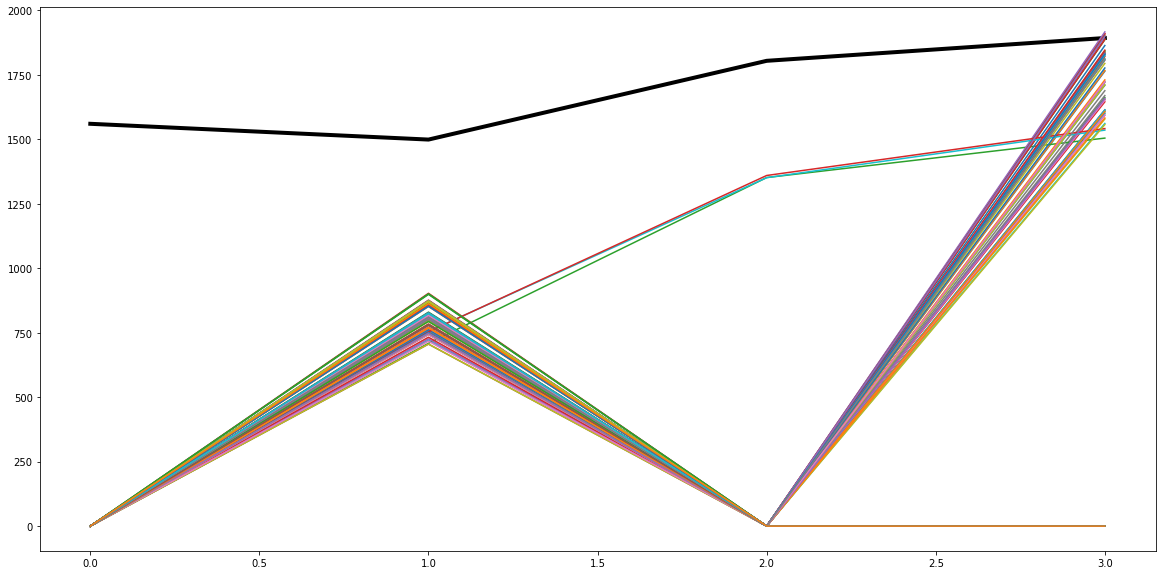

In [14]:
import matplotlib.pyplot as plt
import numpy as np
calibration_data = pd.read_csv('calibration_data_1.csv').iloc[[13, 37, 61, 75]]
fig, axs = plt.subplots(1, figsize = (20, 10))
axs.plot(calibration_data['secd_flow'].values,
         color = 'k', linewidth = 4, label = 'True')
mapes = []
cvrmses = []
for i in range(len(results)):
    result_this = results[i][0:50]
    axs.plot(result_this, label = 'run_{}'.format(i))
    mape_i = 100*(abs(calibration_data['secd_flow'].values 
                 - np.array(result_this))/\
                 calibration_data['secd_flow'].values).mean()
    mapes.append(mape_i)
    cvrmse_i = (((calibration_data['secd_flow'].values 
                 - np.array(result_this))**2).sum()/len(result_this))**0.5/\
                calibration_data['secd_flow'].values.mean()
    cvrmses.append(cvrmse_i)
    

In [6]:
def get_t(mo_path):
    prim_pipe_v_nominal = None
    secd_pipe_v_nominal = None
    term_d = None
    with open(mo_path) as file:
        lines = file.readlines()
        for line in lines:
            if 'parameter Real prim_pipe_v_nominal=' in line:
                prim_pipe_v_nominal = float(line
                                     .split('parameter Real prim_pipe_v_nominal=')[-1]
                                     .split('"')[0]
                                     .strip())
            if 'parameter Real secd_pipe_v_nominal=' in line:
                secd_pipe_v_nominal = float(line
                                     .split('parameter Real secd_pipe_v_nominal=')[-1]
                                     .split('"')[0]
                                     .strip())
            if 'parameter Real terminal_dpopen=' in line:
                term_d = float(line
                                     .split('parameter Real terminal_dpopen=')[-1]
                                     .split('"')[0]
                                     .strip())
            if prim_pipe_v_nominal is not None and secd_pipe_v_nominal is not None and term_d is not None:
                break
    return prim_pipe_v_nominal, secd_pipe_v_nominal, term_d
            

In [7]:
# get model parameters
converged_parameters = []
unconverged_parameters = []
for i in tgt_dirs:
    res_dir = 'tongwei_v5_sssim_cali_exp_1_{}'.format(i)
    contents = os.listdir(res_dir)
    for content in contents:
        if 'run' in content:
            content_path = res_dir + os.sep + content
            mo_file_path = res_dir + os.sep + content\
                        + os.sep + 'compilation'\
                        + os.sep + 'tongwei_shuili_balance_v5.mo'
            prim_pipe_v_nominal, secd_pipe_v_nominal, term_d = get_t(mo_file_path)
            if content_path in unconverged_res:
                unconverged_parameters.append([prim_pipe_v_nominal, secd_pipe_v_nominal, term_d])
            elif content_path in converged_res:
                converged_parameters.append([prim_pipe_v_nominal, secd_pipe_v_nominal, term_d])
converged_parameters = np.array(converged_parameters)
unconverged_parameters = np.array(unconverged_parameters)

In [8]:
converged_parameters

array([[2.86369880e+00, 2.87941470e+00, 4.95899994e+04],
       [8.75096804e-01, 3.81977413e+00, 4.96373971e+04],
       [8.32822703e-01, 3.59727598e+00, 4.90913072e+04],
       [2.34957282e+00, 1.59597421e+00, 4.96598225e+04],
       [2.17805898e+00, 1.99301746e+00, 4.92066383e+04],
       [1.11419205e+00, 1.46839354e+00, 4.99393841e+04],
       [2.74699295e+00, 1.71917555e+00, 4.98870790e+04],
       [1.68435097e+00, 2.22681905e+00, 4.91515532e+04],
       [1.46741678e+00, 2.05827722e+00, 4.97233073e+04],
       [7.90779465e-01, 1.82734667e+00, 4.98619060e+04],
       [2.72181377e+00, 1.23599761e+00, 4.95831411e+04],
       [2.42644930e+00, 2.18698972e+00, 4.98055407e+04],
       [2.51901595e+00, 1.34879647e+00, 4.91730247e+04],
       [1.92153977e+00, 3.60639265e+00, 4.96984224e+04],
       [3.66236577e+00, 2.00540577e+00, 4.95103893e+04],
       [1.67495799e+00, 2.54081866e+00, 4.96307411e+04],
       [1.47281525e+00, 4.16660704e-01, 4.91178589e+04],
       [3.65702167e+00, 4.92307

In [9]:
unconverged_parameters[:, :]

array([[3.87499241e+00, 3.68756845e+00, 4.92757141e+04],
       [1.55422875e+00, 2.92627948e+00, 4.97536985e+04],
       [3.19320464e+00, 1.02103183e+00, 4.97171815e+04],
       [1.10332678e+00, 3.07480074e+00, 4.95154074e+04],
       [2.89548852e+00, 2.51051574e+00, 4.99647736e+04],
       [3.38221446e+00, 3.82237698e+00, 4.95678378e+04]])

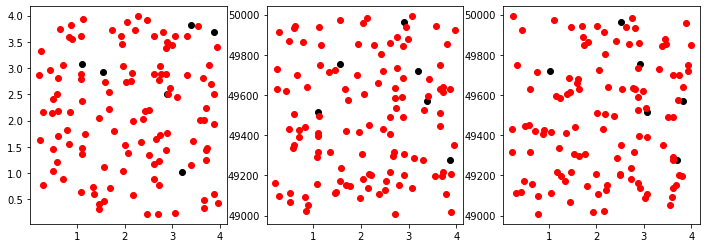

In [10]:
fig = plt.figure(figsize=(12, 4))
axs = fig.subplots(1, 3)
axs[0].scatter(unconverged_parameters[:, 0], unconverged_parameters[:, 1], color = 'k')
axs[0].scatter(converged_parameters[:, 0], converged_parameters[:, 1], color = 'r')
axs[1].scatter(unconverged_parameters[:, 0], unconverged_parameters[:, 2], color = 'k')
axs[1].scatter(converged_parameters[:, 0], converged_parameters[:, 2], color = 'r')
axs[2].scatter(unconverged_parameters[:, 1], unconverged_parameters[:, 2], color = 'k')
axs[2].scatter(converged_parameters[:, 1], converged_parameters[:, 2], color = 'r')

In [22]:
# get all parameters of sensitivity analysis
import os
import pandas as pd
import numpy as np
parameters = []
for i in tgt_dirs:
    res_dir = 'nb_hydr_static_v5_sssim_cali_exp_2_{}'.format(i)
    contents = os.listdir(res_dir)
    for content in contents:
        if 'run' in content:
            data_file_path = res_dir + os.sep + content + os.sep + 'cali_sim_data.csv'
            data_i = pd.read_csv(data_file_path)
            parameters.append(data_i.values[0, -2: ])            
parameters = np.array(parameters)
print(parameters[val_idx])

[[ 48.8060463    1.96063773]
 [127.46801082   0.86501449]
 [ 41.65930882   1.72596248]
 [146.31132548   0.93172401]
 [ 50.3812789    1.61322906]
 [111.86510861   1.4633725 ]
 [101.98466366   1.92543756]
 [ 89.19603074   1.60516291]
 [ 54.36061235   1.3163139 ]
 [ 47.40569761   1.83213433]
 [108.11605443   1.92548839]
 [ 81.95279077   1.97555238]
 [ 87.47165785   1.01290662]
 [148.49363425   1.26755191]
 [116.2882893    0.81274436]
 [ 97.13626519   1.77158334]
 [149.72388912   1.43931055]
 [ 61.69984828   1.57361996]
 [ 57.55336916   1.10504899]
 [ 64.57045824   1.59131734]
 [118.18017065   1.84777166]
 [ 53.60174419   1.54416011]
 [ 83.49110289   1.7000205 ]
 [ 98.73781198   1.07746929]
 [ 89.95352596   0.90780226]
 [ 88.07431602   0.96715671]
 [ 86.76203517   1.1847826 ]
 [ 80.48201254   1.02915936]
 [ 97.52810063   1.05246907]
 [ 88.35956178   1.16661759]
 [ 67.78085154   1.18518988]
 [ 51.94110589   1.13924557]
 [ 73.29768497   0.95269038]
 [ 70.78612207   1.17549426]
 [ 90.50995985

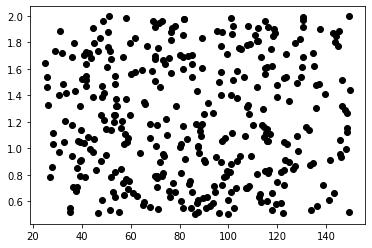

In [24]:
plt.scatter(parameters[:, 0], parameters[:, 1], color ='k')

In [61]:
# get a closer range for the parameters of sensitivity analysis
import os
import pandas as pd
import numpy as np
parameters = []
run_dirs = []
mape_thres = 100
y_true = calibration_data['NB2_S_x_NYZ_x_x_Fcw_x'].values

for i in tgt_dirs:
    res_dir = 'nb_hydr_static_v5_sssim_cali_exp_2_{}'.format(i)
    contents = os.listdir(res_dir)
    for content in contents:
        if 'run' in content:
            data_file_path = res_dir + os.sep + content + os.sep + 'cali_sim_data.csv'
            data_i = pd.read_csv(data_file_path)
            y_pred_i = data_i['m_flow_pred'].values
            mape_i = 100*(abs(y_true - y_pred_i)/y_true).mean()
            if mape_i <= mape_thres:
                parameters.append(data_i.values[0, -2: ])
                run_dirs.append(res_dir + os.sep + content)
            
parameters = np.array(parameters)
print(len(run_dirs))

278


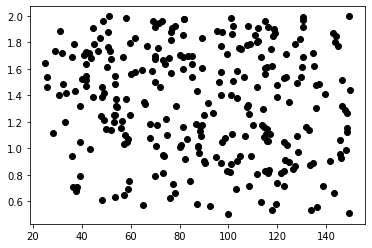

In [62]:
plt.scatter(parameters[:, 0], parameters[:, 1], color ='k')

In [63]:
# collect all cali_sim_data
cali_sim_data_all = None
for i in tgt_dirs:
    res_dir = 'nb_hydr_static_v5_sssim_cali_exp_2_{}'.format(i)
    contents = os.listdir(res_dir)
    for content in contents:
        if 'run' in content:
            data_file_path = res_dir + os.sep + content + os.sep + 'cali_sim_data.csv'
            if (res_dir + os.sep + content) in run_dirs:
                data_i = pd.read_csv(data_file_path)
                if cali_sim_data_all is None:
                    cali_sim_data_all = data_i
                else:
                    cali_sim_data_all = pd.concat([cali_sim_data_all, data_i],
                                          ignore_index = True)

In [64]:
cali_sim_data_all.shape

(57268, 10)

In [65]:
cali_sim_data_all.to_csv('cali_sim_data_all.csv')

In [69]:
# Down sample
from BayesianCalibration.DownSampler import DownSampler
import pandas as pd
cali_sim_data_path = './cali_exp_2/cali_sim_data_all.csv'
cali_field_data_path = './cali_exp_2/cali_field_data_all.csv'
bins = 30
quality_thres = 0.8
dirichlet_prior = 0.5
sim_df = pd.read_csv(cali_sim_data_path)
field_df = pd.read_csv(cali_field_data_path)
d_sim = sim_df.values
d_field = field_df.values

ds_d_sim = DownSampler(d_sim, bins = bins, dirichlet_prior = dirichlet_prior)
(d_sim_down, d_sim_sp_hist) = ds_d_sim.sample(stSampleSize = 50, 
                                              increRatio = 1.05, 
                                              qualityThres = quality_thres)
d_sim_down_df = pd.DataFrame(d_sim_down)
d_sim_down_df.columns = [list(sim_df.columns)]
d_sim_down_df.to_csv('./cali_exp_2/cali_sim_data_down.csv')

[0.01388719 0.02851631 0.03949688 0.04478641 0.03439939 0.03136184
 0.02624688 0.02732923 0.02928443 0.03637205 0.04269155 0.04895868
 0.05651764 0.05171691 0.05917113 0.04878411 0.05044254 0.049849
 0.04056177 0.04525776 0.03827488 0.04084109 0.03218232 0.02085261
 0.02626434 0.01507428 0.00868495 0.0056474  0.005403   0.00114345]
52
54
56
58
60
63
66
69
72
75
78
81
85
89
93
97
101
106
111
116
121
127
133
139
145
152
159
166
174
182
191
200
210
220
231
